# Regressão Linear

Nesta aula, iremos explorar os conceitos de regressão linear que foram introduzidos anteriormente no curso, adotando agora uma perspectiva Bayesiana. Esta abordagem nos permite incorporar conhecimento prévio e incertezas nos modelos, oferecendo uma visão mais rica e fundamentada das relações entre variáveis.

Nosso foco será na aplicação de um modelo de regressão linear aos dados agrícolas, com o intuito de examinar como a precipitação influencia o rendimento das colheitas, medido em hectogramas por hectare (hg/ha). A regressão linear serve como uma ferramenta valiosa para dissecar a dinâmica entre as variações na quantidade de chuva e seu impacto no rendimento agrícola.

É comum a expectativa de que um incremento na precipitação contribua positivamente para o rendimento das colheitas até um determinado limite, promovendo uma maior disponibilidade de água para as plantas. Contudo, a partir de um certo ponto, a precipitação excessiva pode acarretar em efeitos negativos, como o alagamento e a erosão do solo, que podem comprometer a produtividade agrícola.

Para aprofundar nossa análise e testar essas hipóteses, utilizaremos dados disponíveis publicamente, que podem ser acessados através do link: [Conjunto de Dados de Previsão de Rendimento de Colheitas](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset?resource=download&select=yield_df.csv).

Ao aplicarmos técnicas de regressão linear Bayesiana a esses dados, buscamos não apenas quantificar a relação entre precipitação e rendimento das colheitas, mas também entender a natureza e os limites dessa relação, fornecendo insights valiosos para o planejamento e a gestão agrícola.


Primeiramente, vamos baixar o conjunto de dados.

In [1]:
!wget https://raw.githubusercontent.com/romefeller/predictive/main/dados/yield_df.csv

--2024-03-12 17:38:39--  https://raw.githubusercontent.com/romefeller/predictive/main/dados/yield_df.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1565376 (1.5M) [text/plain]
Saving to: ‘yield_df.csv’

yield_df.csv        100%[===================>]   1.49M  --.-KB/s    in 0.06s   

2024-03-12 17:38:39 (26.0 MB/s) - ‘yield_df.csv’ saved [1565376/1565376]



In [2]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [3]:
crop = pd.read_csv("yield_df.csv")

crop

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [ ]:
crop["Item"].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [4]:
item = "Potatoes"

product = crop[(crop["Item"] == item)]

product_crop = product[["avg_temp","hg/ha_yield"]]

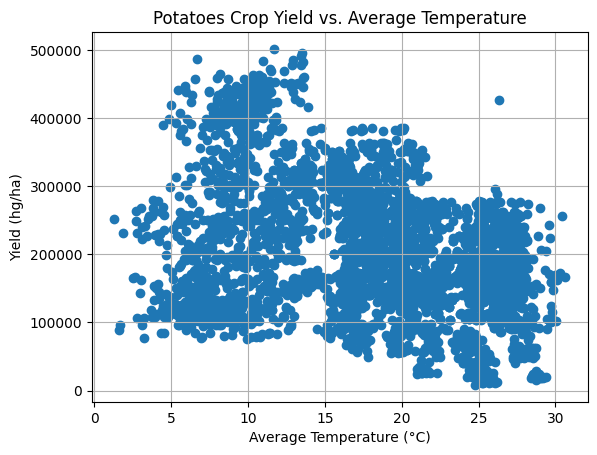

In [ ]:
plt.scatter(product_crop['avg_temp'], product_crop['hg/ha_yield'])
plt.title(item + ' Rendimento da Colheita vs. Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Rendimento da Colheita (hg/ha)')
plt.grid(True)
plt.show()

Busca-se desenvolver um modelo de regressão linear para explorar a relação entre o rendimento agrícola, expresso em hectogramas por hectare, e a temperatura ambiente, medida em graus Celsius. O modelo proposto é expresso pela equação $$y(t) = a + bt + ɛ$$, na qual $y(t)$ simboliza o rendimento das culturas em função da temperatura $t$, $a$ é o intercepto com o eixo y, representando o rendimento estimado na ausência de variação de temperatura, e $b$ é o coeficiente angular, indicando a taxa de variação do rendimento por cada grau de mudança na temperatura. A variável $ɛ$ representa o erro do modelo. Esse coeficiente $b$ é crucial, pois quantifica o impacto direto da temperatura sobre o rendimento das culturas, permitindo inferências sobre como variações climáticas podem afetar a produtividade agrícola.


In [6]:
t = product["avg_temp"]
obs = product["hg/ha_yield"]
with pm.Model() as crop_model:
  a = pm.Normal("a",100000,20000)
  b = pm.Normal("b",-2000,10000)

  eps = pm.Normal("eps",0,10000)

  likelihood = pm.Normal("y_obs",a+b*t,eps,observed=obs)

In [7]:
crop_model

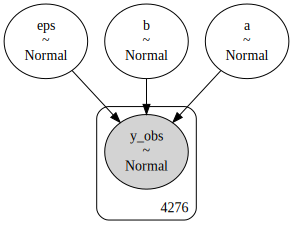

In [8]:
pm.model_to_graphviz(crop_model)

In [9]:
with crop_model:
  trace = pm.sample()

In [10]:
pm.summary(trace)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,286669.170,3754.092,279789.498,293349.351,122.337,86.532,937.0,789.0,1.0
b,-4612.965,184.270,-4971.749,-4301.790,6.053,4.282,928.0,981.0,1.0
eps,85955.863,913.536,84129.019,87526.836,27.954,19.816,1105.0,705.0,1.0


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>,
       <Axes: title={'center': 'eps'}>], dtype=object)

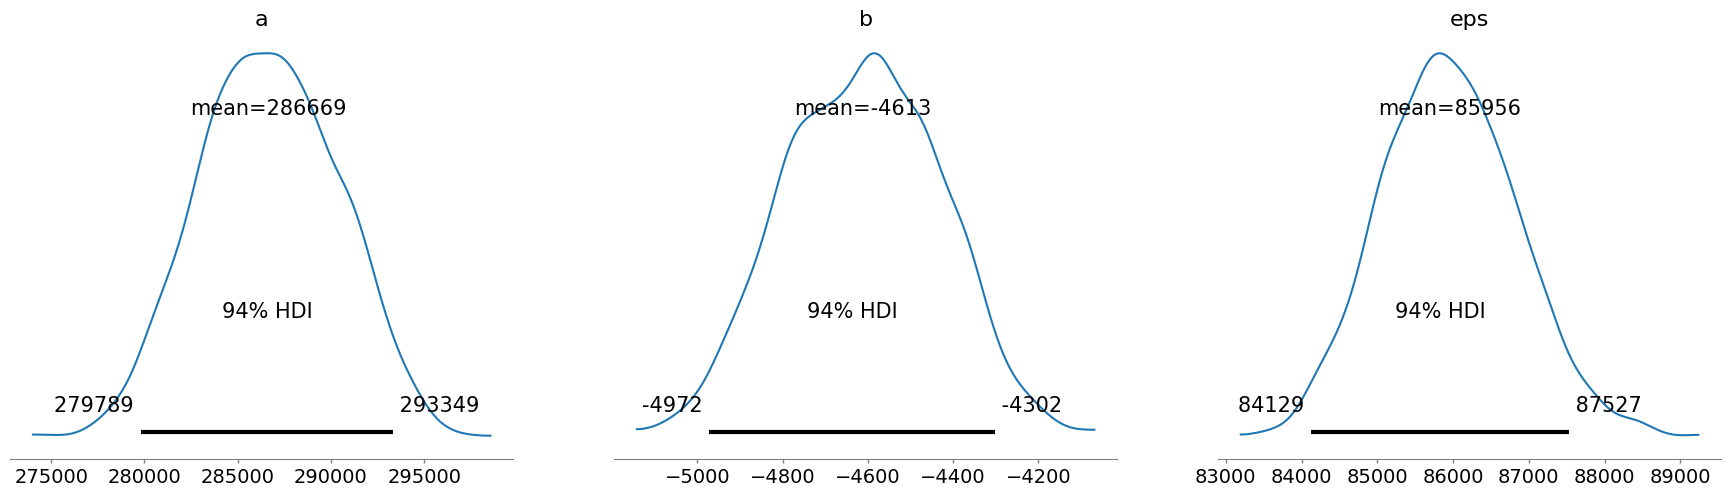

In [11]:
az.plot_posterior(trace)

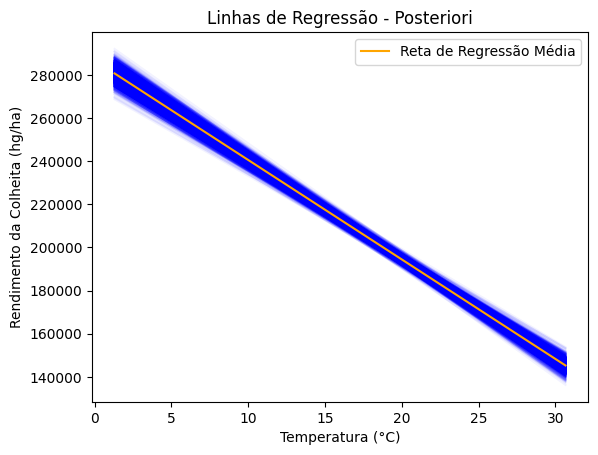

In [12]:
a_samples = trace.posterior["a"].values.flatten()
b_samples = trace.posterior["b"].values.flatten()
t_values = np.linspace(t.min(), t.max(), 100)

for a_sample, b_sample in zip(a_samples, b_samples):
    plt.plot(t_values, a_sample + b_sample * t_values, color="blue", alpha=0.05)

mean_a = a_samples.mean()
mean_b = b_samples.mean()
plt.plot(t_values, mean_a + mean_b * t_values, color="orange", label="Reta de Regressão Média")

#plt.scatter(t, obs, color="red", label="Observed Data", alpha=0.5)

plt.xlabel("Temperatura (°C)")
plt.ylabel("Rendimento da Colheita (hg/ha)")
plt.title("Linhas de Regressão - Posteriori")
plt.legend()
plt.show()

In [13]:
obs_norm = (obs - obs.mean())/obs.std()

obs_norm

1       -1.425696
7       -1.306283
13      -1.251647
19      -1.085384
24      -1.267882
           ...   
28204   -0.360514
28212   -0.353135
28220   -0.347663
28228   -0.299057
28236   -0.365033
Name: hg/ha_yield, Length: 4276, dtype: float64

In [ ]:
with pm.Model() as crop_model_norm:
  a = pm.Normal("a",0,1)
  b = pm.Normal("b",0,1)

  eps = pm.Normal("eps",0,1)

  likelihood = pm.Normal("y_obs",a+b*t,observed=obs_norm)

In [ ]:
with crop_model_norm:
  trace_norm = pm.sample()

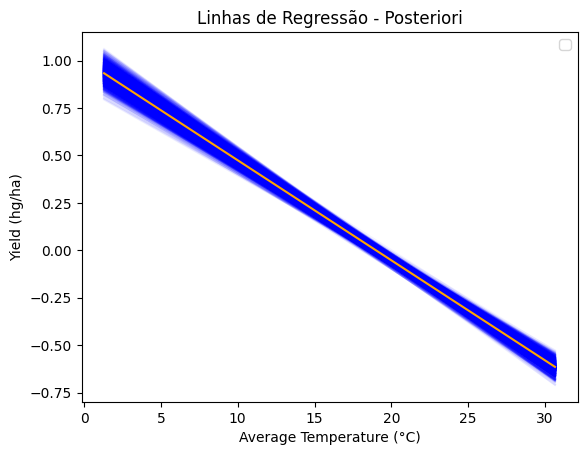

In [ ]:
a_samples = trace_norm.posterior["a"].values.flatten()
b_samples = trace_norm.posterior["b"].values.flatten()
t_values = np.linspace(t.min(), t.max(), 100)

for a_sample, b_sample in zip(a_samples, b_samples):
    plt.plot(t_values, a_sample + b_sample * t_values, color="blue", alpha=0.05)

mean_a = a_samples.mean()
mean_b = b_samples.mean()
plt.plot(t_values, mean_a + mean_b * t_values, color="orange", )

#plt.scatter(t, obs_norm, color="red", alpha=0.5)

plt.xlabel("Temperatura (°C)")
plt.ylabel("Rendimento da Colheita (hg/ha)")
plt.title("Linhas de Regressão - Posteriori")
plt.legend()
plt.show()

In [ ]:
pm.summary(trace_norm)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.002,0.045,0.919,1.092,0.002,0.001,646.0,693.0,1.00
b,-0.053,0.002,-0.057,-0.049,0.000,0.000,651.0,697.0,1.00
eps,-0.040,1.032,-1.822,1.938,0.030,0.030,1164.0,1014.0,1.01


O modelo descrito, com prioris normais para o intercepto $a$ e a inclinação $b$, além de uma distribuição normal para o termo de erro $\varepsilon$, alinha-se com a interpretação bayesiana da Regressão Ridge, também conhecida como regularização de Tikhonov em outros contextos.

Na regressão linear tradicional, a Regressão Ridge introduz um termo de penalidade no tamanho dos coeficientes para prevenir o sobreajuste e gerenciar a multicolinearidade. O termo de penalidade é proporcional ao quadrado da magnitude dos coeficientes, o que incentiva coeficientes menores e mais regularizados, mas não os define exatamente como zero (como a regressão Lasso faria).

No contexto bayesiano, o equivalente à adição de um termo de penalidade é usar distribuições a priori que limitam a gama de valores plausíveis para os parâmetros do modelo. Os prioris normais usados para $a$, $b$ e $\varepsilon$ no modelo PyMC cumprem essa função, agindo como uma regularização que incentiva a seleção de coeficientes menores para reduzir o sobreajuste.


In [ ]:
with pm.Model() as crop_lasso:
  a = pm.Laplace("a",0,1)
  b = pm.Laplace("b",0,1)

  eps = pm.Normal("eps",0,1)

  likelihood = pm.Normal("y_obs",a+b*t,eps,observed=obs_norm)

In [ ]:
with crop_lasso:
  trace_lasso = pm.sample()

In [ ]:
pm.summary(trace_lasso)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.000,0.040,0.926,1.072,0.002,0.001,629.0,995.0,1.0
b,-0.053,0.002,-0.056,-0.049,0.000,0.000,656.0,1015.0,1.0
eps,0.928,0.010,0.911,0.947,0.000,0.000,1162.0,1356.0,1.0


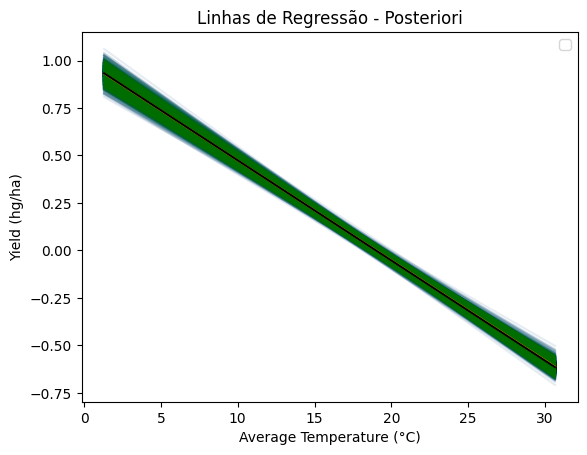

In [ ]:
a_samples = trace_lasso.posterior["a"].values.flatten()
b_samples = trace_lasso.posterior["b"].values.flatten()

a_samples_r = trace_norm.posterior["a"].values.flatten()
b_samples_r = trace_norm.posterior["b"].values.flatten()

t_values = np.linspace(t.min(), t.max(), 100)

for a_sample, b_sample in zip(a_samples, b_samples):
    plt.plot(t_values, a_sample + b_sample * t_values, color="blue", alpha=0.05)

for a_sample_r, b_sample_r in zip(a_samples, b_samples):
    plt.plot(t_values, a_sample_r + b_sample_r * t_values, color="green", alpha=0.05)

mean_a = a_samples.mean()
mean_b = b_samples.mean()
plt.plot(t_values, mean_a + mean_b * t_values, color="orange" )

mean_a_r = a_samples_r.mean()
mean_b_r = b_samples_r.mean()
plt.plot(t_values, mean_a_r + mean_b_r * t_values, color="black" )

#plt.scatter(t, obs_norm, color="red", alpha=0.5)

plt.xlabel("Temperatura (°C)")
plt.ylabel("Rendimento da Colheita (hg/ha)")
plt.title("Linhas de Regressão - Posteriori")
plt.legend()
plt.show()

In [ ]:
with pm.Model() as crop_robust:
  a = pm.Normal("a",0,1)
  b = pm.Normal("b",0,1)

  eps = pm.Normal("eps",0,1)
  df = pm.Exponential("df",1)

  likelihood = pm.StudentT("y_obs",nu=df,mu=a+b*t,sigma=eps,observed=obs_norm)

In [ ]:
with crop_robust:
  trace_robust = pm.sample()

In [ ]:
pm.summary(trace_robust)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.962,0.043,0.881,1.040,0.001,0.001,874.0,1300.0,1.0
b,-0.051,0.002,-0.055,-0.047,0.000,0.000,918.0,1234.0,1.0
eps,0.893,0.011,0.873,0.913,0.000,0.000,1216.0,1045.0,1.0
df,21.453,3.104,15.859,27.108,0.092,0.065,1121.0,1033.0,1.0


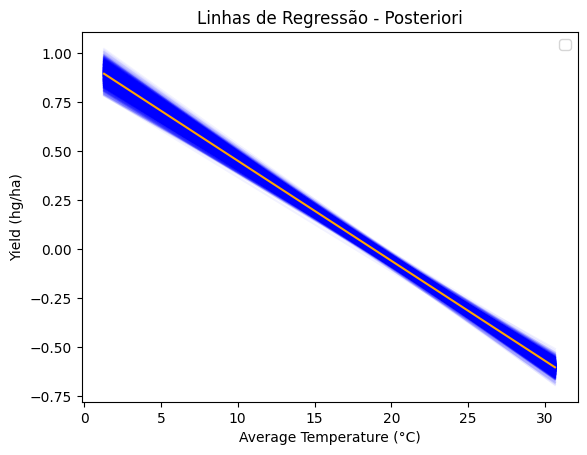

In [ ]:
a_samples = trace_robust.posterior["a"].values.flatten()
b_samples = trace_robust.posterior["b"].values.flatten()
t_values = np.linspace(t.min(), t.max(), 100)

for a_sample, b_sample in zip(a_samples, b_samples):
    plt.plot(t_values, a_sample + b_sample * t_values, color="blue", alpha=0.05)

mean_a = a_samples.mean()
mean_b = b_samples.mean()
plt.plot(t_values, mean_a + mean_b * t_values, color="orange", )

#plt.scatter(t, obs_norm, color="red", alpha=0.5)

plt.xlabel("Temperatura (°C)")
plt.ylabel("Rendimento da Colheita (hg/ha)")
plt.title("Linhas de Regressão - Posteriori")
plt.legend()
plt.show()

# Log-likelihood

Para realizar uma comparação eficaz entre modelos, é crucial calcular o logaritmo da verossimilhança (log-likelihood) dos traços gerados. Neste contexto, os três modelos em foco são o modelo de Ridge (aplicado a dados de rendimento de culturas normalizados), o modelo de Lasso e o modelo Robusto. O log-likelihood é uma métrica fundamental na avaliação da adequação de um modelo aos dados observados, refletindo a probabilidade dos dados dados os parâmetros estimados pelo modelo. Matematicamente, o log-likelihood é expresso pela fórmula:

$$
\log(\mathcal{L}(\theta|Y)) = \sum_{i=1}^{n} \log(p(y_i|\theta)),
$$

onde:
- $\mathcal{L}(\theta|Y)$ representa a verossimilhança dos parâmetros $\theta$ dados os dados observados Y,
- $n$ é o número total de observações,
- $p(y_i|\theta)$ é a função de densidade de probabilidade das observações $y_i$ dados os parâmetros $\theta$.

Esta fórmula nos permite quantificar quão bem um modelo específico se ajusta aos dados, com valores maiores de log-likelihood indicando um ajuste melhor. Ao comparar os valores de log-likelihood entre os modelos de Ridge, Lasso e Robusto, podemos determinar qual modelo oferece a melhor explicação para os dados observados, levando em consideração a complexidade do modelo e a precisão das previsões geradas.


In [ ]:
with crop_model_norm:
    pm.compute_log_likelihood(trace_norm)

with crop_lasso:
    pm.compute_log_likelihood(trace_lasso)

with crop_robust:
    pm.compute_log_likelihood(trace_robust)

Para realizar uma comparação eficiente entre os modelos, utilizaremos o pacote ArviZ. A métrica ELPD LOO (Expected Log Pointwise Predictive Density for Leave-One-Out Cross-Validation) é uma métrica valiosa para avaliação de modelos estatísticos. Ela quantifica o desempenho preditivo esperado do modelo quando aplicado a novos dados, baseando-se na capacidade do modelo de prever observações fora da amostra. Matematicamente, a ELPD LOO pode ser expressa pela fórmula:

$$
\text{ELPD LOO} = \sum_{i=1}^{n} \log(p(y_i | \theta_{-i})),
$$

onde n é o número total de observações, $y_i$ é a i-ésima observação real, e $\theta_{-i}$ representa os parâmetros do modelo estimados sem incluir a i-ésima observação. Esta abordagem de validação cruzada deixa um fora (LOO) ajuda a entender quão bem o modelo pode generalizar para novos dados. Valores maiores de ELPD LOO indicam um modelo com melhor capacidade preditiva.


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

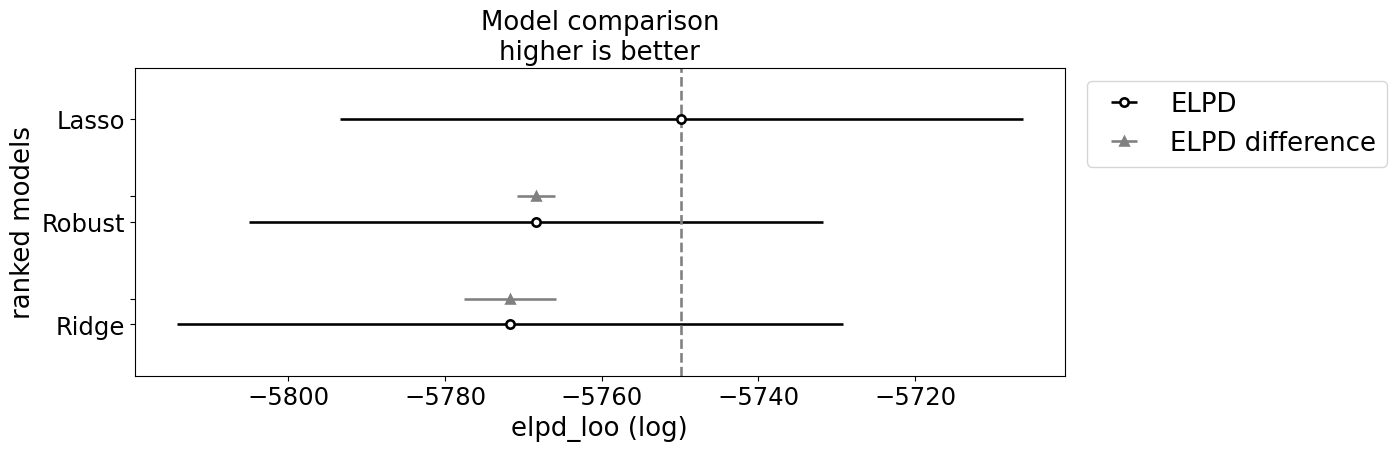

In [ ]:
model_compare = az.compare(
    {
        "Ridge": trace_norm,
        "Lasso": trace_lasso,
        "Robust": trace_robust
    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [ ]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Lasso,0,-5749.866008,3.161553,0.000000,9.998484e-01,43.579757,0.000000,False,log
Robust,1,-5768.367927,3.490159,18.501919,1.752147e-07,36.602783,2.405752,False,log
Ridge,2,-5771.700433,2.026786,21.834425,1.514083e-04,42.510536,5.917051,False,log


- **rank**: A classificação dos modelos baseada na métrica escolhida para comparação, geralmente ELPD LOO. O modelo com o melhor desempenho recebe o rank 1.
- **elpd_loo**: Expected Log Pointwise Predictive Density for Leave-One-Out Cross-Validation. Uma métrica de desempenho preditivo do modelo; valores maiores indicam melhor desempenho.
- **p_loo**: O número efetivo de parâmetros do modelo. Reflete a complexidade do modelo, onde modelos mais simples tendem a ter um valor menor.
- **elpd_diff**: A diferença no ELPD LOO entre o modelo em questão e o modelo com o melhor desempenho. Para o modelo de melhor desempenho, esse valor é 0.
- **weight**: Peso atribuído ao modelo em um procedimento de média de modelos, indicando a contribuição relativa de cada modelo para a previsão combinada.
- **se**: O erro padrão da estimativa do ELPD LOO. Fornece uma medida da incerteza associada à estimativa do desempenho preditivo do modelo.
- **dse**: Diferença do erro padrão entre as estimativas de ELPD LOO de dois modelos. Indica a incerteza na diferença de desempenho entre eles.
- **warning**: Indica se há algum aviso relacionado à confiabilidade das estimativas do LOO para o modelo, por exemplo, devido a valores altos do diagnóstico de Pareto k.
- **scale**: A escala usada para as métricas de comparação, geralmente logarítmica para ELPD LOO, ajudando a interpretar as diferenças em termos de razão de verossimilhanças.


In [ ]:
az.loo(trace_norm)

<ipython-input-61-23fc10c2182e>:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  az.loo(trace_norm)


Computed from 2000 posterior samples and 4276 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -5771.70    36.65
p_loo        2.03        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     4276  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [ ]:
az.loo(trace_lasso)

<ipython-input-62-52d00cdf7ffa>:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  az.loo(trace_lasso)


Computed from 2000 posterior samples and 4276 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -5749.87    42.57
p_loo        3.16        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     4276  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [ ]:
az.loo(trace_robust)

<ipython-input-63-8add1814035c>:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  az.loo(trace_robust)


Computed from 2000 posterior samples and 4276 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -5768.37    43.65
p_loo        3.49        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     4276  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

# Exercícios

1. Inclua um modelo de regressão linear sem regularização. Para isso use um *flat prior*. Inclua este modelo na comparação. Esse modelo possui uma capacidade preditiva melhor que os outros?
2. Refaça os modelos de regressão de Ridge, Lasso e Robusto para o item graõs de soja ao invés de batatas.
3. O modelo robusto acima diferiu dos outros significativamente? Plote as retas comparando os modelos.
4. Identifique o melhor modelo usando o ELPD LOO.
5. Faça os modelos de regressão e analise o melhor usando as relações *crop yield vs pesticide* e *crop yield vs rain fall*. Você terá que usar a função groupby do pandas.
